# Table of Contents

## 1. Importing Data
## 2. Post Wrangling Data Validation
## 3. Exploratory Data Analysis

### 3.1. Residential Analysis

#### 3.1.1. Average Residental Natural Gas Consumption by Month in the Last 10 Years
#### 3.1.2. Total Residential Natural Gas Consumption by Year in the Last 10 Years


### 3.2. Commercial Analysis

#### 3.1.1. Average Residental Natural Gas Consumption by Month in the Last 10 Years
#### 3.2.2. Total Residential Natural Gas Consumption by Year in the Last 10 Years

### 3.3. Comparison of Residential and Commercial Natural Gas Consumption Analysis

#### 3.3.1. Comparison of Average Natural Gas Consumption by Month in the Last 10 Years
#### 3.3.2. Comparison of Total Natural Gas Consumption by Year in the Last 10 Years

## 4. Exporting Data







---
## 1. Importing Data


In [39]:
# import libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# define the path to the data directory

path = r'/Users/berkergoz/Desktop/US_Gas_Analysis'

In [ ]:
# load the data

df = pd.read_parquet(os.path.join(path, '02_Data', 'prepared_data', 'gas_data_cleaned.parquet'))

In [9]:
# check the first few rows of the dataframe

df.head()

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,SFL,FLORIDA,VCS,Commercial Consumption,6605.0,MMCF
2014-01-01,2014,1,SNH,USA-NH,VCS,Commercial Consumption,1691.0,MMCF
2014-01-01,2014,1,SOR,USA-OR,VCS,Commercial Consumption,4711.0,MMCF
2014-01-01,2014,1,SDE,USA-DE,VCS,Commercial Consumption,2128.0,MMCF
2014-01-01,2014,1,SAZ,USA-AZ,VCS,Commercial Consumption,3915.0,MMCF


---
## 2. Post Wrangling Data Validation

### 2.1. Negative Values Control

In [20]:
# check if there are any negative values in the 'value' column

df[df['value'] < 0].value_counts()

Series([], Name: count, dtype: int64)

### 2.2. Time Range Control

In [31]:
# check the minimum value of date column

df.index.min() # the date column is index, so we can use df.index.min()

Timestamp('2014-01-01 00:00:00')

In [29]:
# check the minimum value of date column

df.index.max()

Timestamp('2024-01-01 00:00:00')

### 2.3. Outliers Control

In [32]:
# check the descriptive analysis of the dataframe

df.describe()

,year,month,value
count,12558.000000,12558.000000,1.255800e+04
mean,2018.535754,6.451744,1.304209e+04
std,2.898614,3.471981,5.707661e+04
min,2014.000000,1.000000,4.100000e+01
25%,2016.000000,3.000000,1.251250e+03
50%,2019.000000,6.000000,2.879000e+03
75%,2021.000000,9.000000,7.730250e+03
max,2024.000000,12.000000,1.037197e+06


In [36]:
# increase readability of the descriptive analysis

df["value"].describe().apply(lambda x: f"{x:,.0f}")


count       12,558
mean        13,042
std         57,077
min             41
25%          1,251
50%          2,879
75%          7,730
max      1,037,197
Name: value, dtype: object

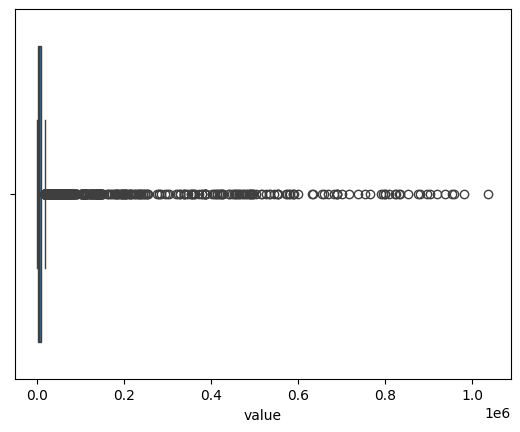

In [37]:
# viusalize outliers in the 'values' 

sns.boxplot(x=df['value'])
plt.show()

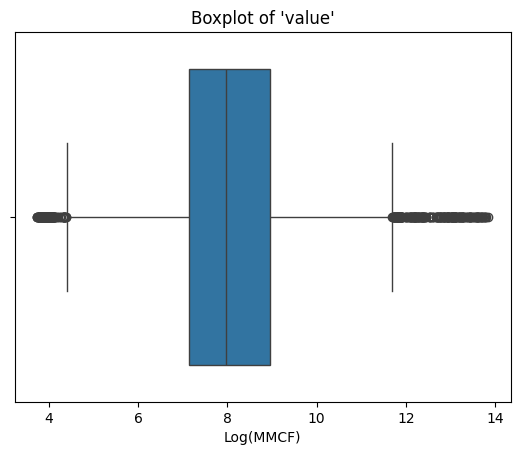

In [78]:
# visualize the distribution of the 'value' column in log scale to address outliers better

# Create a figure and axis for better control
fig, ax = plt.subplots()

# Plot the boxplot on the axis
sns.boxplot(x=np.log1p(df["value"]), ax=ax)

# Add title and label
ax.set_title("Boxplot of 'value'")
ax.set_xlabel("Log(MMCF)")

# Show the plot
plt.show()

In [79]:
# save the fig

fig.savefig(os.path.join(path, '04_Visualizations', 'boxplot_value.png'))

In [52]:
# checking the top 10 values in ascending order to understand the maximum values
df.sort_values("value", ascending=False).head(10)

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,NUS,U.S.,VRS,Residential Consumption,1037197.0,MMCF
2018-01-01,2018,1,NUS,U.S.,VRS,Residential Consumption,981276.0,MMCF
2022-01-01,2022,1,NUS,U.S.,VRS,Residential Consumption,958107.0,MMCF
2019-01-01,2019,1,NUS,U.S.,VRS,Residential Consumption,953787.0,MMCF
2015-01-01,2015,1,NUS,U.S.,VRS,Residential Consumption,937954.0,MMCF
2024-01-01,2024,1,NUS,U.S.,VRS,Residential Consumption,918996.0,MMCF
2015-02-01,2015,2,NUS,U.S.,VRS,Residential Consumption,902364.0,MMCF
2021-01-01,2021,1,NUS,U.S.,VRS,Residential Consumption,895265.0,MMCF
2016-01-01,2016,1,NUS,U.S.,VRS,Residential Consumption,878936.0,MMCF


In [54]:
# checking the tail of the data to understand the minimum values

df.sort_values("value", ascending=True).head(10)


,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2015-09-01,2015,9,SHI,USA-HI,VRS,Residential Consumption,41.0,MMCF
2014-08-01,2014,8,SME,USA-ME,VRS,Residential Consumption,41.0,MMCF
2014-07-01,2014,7,SME,USA-ME,VRS,Residential Consumption,41.0,MMCF
2017-08-01,2017,8,SHI,USA-HI,VRS,Residential Consumption,42.0,MMCF
2019-11-01,2019,11,SHI,USA-HI,VRS,Residential Consumption,42.0,MMCF
2015-08-01,2015,8,SHI,USA-HI,VRS,Residential Consumption,43.0,MMCF
2019-09-01,2019,9,SHI,USA-HI,VRS,Residential Consumption,43.0,MMCF
2014-10-01,2014,10,SHI,USA-HI,VRS,Residential Consumption,43.0,MMCF
2022-10-01,2022,10,SHI,USA-HI,VRS,Residential Consumption,43.0,MMCF


In [55]:
# checking the area names to understand the unique values in the 'area-name' column
df['area-name'].unique()

array(['FLORIDA', 'USA-NH', 'USA-OR', 'USA-DE', 'USA-AZ', 'USA-WV',
       'USA-HI', 'USA-NM', 'USA-MI', 'USA-MT', 'USA-MD', 'USA-MO',
       'WASHINGTON', 'USA-LA', 'USA-NE', 'USA-AR', 'USA-NJ', 'USA-ID',
       'USA-SC', 'USA-OK', 'USA-UT', 'USA-ND', 'MINNESOTA', 'USA-WY',
       'USA-VA', 'USA-NC', 'USA-MS', 'USA-IA', 'USA-IL', 'USA-TN',
       'CALIFORNIA', 'USA-VT', 'USA-NV', 'USA-GA', 'USA-AL', 'NEW YORK',
       'USA-SD', 'USA-CT', 'USA-WI', 'COLORADO', 'USA-KS',
       'MASSACHUSETTS', 'OHIO', 'USA-AK', 'USA-KY', 'USA-DC', 'U.S.',
       'USA-RI', 'USA-PA', 'USA-IN', 'TEXAS', 'USA-ME'], dtype=object)

In [57]:
# checking how many rows are there for the 'U.S.' area name

len(df[df['area-name'] == 'U.S.'])

242

In [58]:
# checking the descriptive statistics of the 'U.S.' area name

df[df['area-name'] == 'U.S.']['value'].describe().apply(lambda x: f"{x:,.0f}")

count          242
mean       338,882
std        235,831
min         99,781
25%        141,970
50%        239,660
75%        478,246
max      1,037,197
Name: value, dtype: object

Comment: It seems like the U.S. column has the highest valeus in the 'value' column, therefore the best approach would be to leave it out.

In [59]:
# dropping US 
df2 = df[df['area-name'] != 'U.S.']

In [72]:
# checking the shape of the new dataframe

df2.shape

(12316, 8)

In [60]:
# checking the top 5 valeus

df2.head()

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,SFL,FLORIDA,VCS,Commercial Consumption,6605.0,MMCF
2014-01-01,2014,1,SNH,USA-NH,VCS,Commercial Consumption,1691.0,MMCF
2014-01-01,2014,1,SOR,USA-OR,VCS,Commercial Consumption,4711.0,MMCF
2014-01-01,2014,1,SDE,USA-DE,VCS,Commercial Consumption,2128.0,MMCF
2014-01-01,2014,1,SAZ,USA-AZ,VCS,Commercial Consumption,3915.0,MMCF


In [69]:
# checking the descriptive statistics

df2["value"].describe().apply(lambda x: f"{x:,.0f}")

count     12,316
mean       6,640
std       10,296
min           41
25%        1,232
50%        2,791
75%        7,261
max      101,155
Name: value, dtype: object

Observation: Maximum values are filtered out.

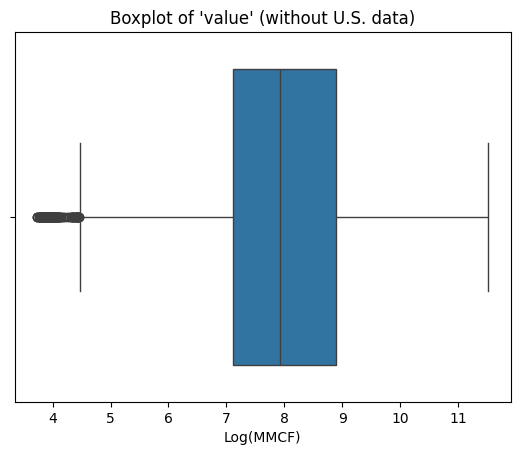

In [76]:
# Create a figure and axis for better control
fig, ax = plt.subplots()

# Plot the boxplot on the axis
sns.boxplot(x=np.log1p(df2["value"]), ax=ax)

# Add title and label
ax.set_title("Boxplot of 'value' (without U.S. data)")
ax.set_xlabel("Log(MMCF)")

# Show the plot
plt.show()

In [77]:
# save the graph to a file

fig.savefig(os.path.join(path, '04_Visualizations', 'boxplot_value_no_us.png'))

---
# 3. Exploratory Data Analysis

### 3.1. Residential Analysis


#### 3.1.1. Average Residental Natural Gas Consumption by Month in the Last 10 Years


In [107]:
df2.head()

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,SFL,FLORIDA,VCS,Commercial Consumption,6605.0,MMCF
2014-01-01,2014,1,SNH,USA-NH,VCS,Commercial Consumption,1691.0,MMCF
2014-01-01,2014,1,SOR,USA-OR,VCS,Commercial Consumption,4711.0,MMCF
2014-01-01,2014,1,SDE,USA-DE,VCS,Commercial Consumption,2128.0,MMCF
2014-01-01,2014,1,SAZ,USA-AZ,VCS,Commercial Consumption,3915.0,MMCF


In [145]:
# filter only residential consumption data

df_res = df2[df2['process-name'] == 'Residential Consumption']

In [146]:
# check the new dataframe

df_res.head()

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,SMD,USA-MD,VRS,Residential Consumption,19505.0,MMCF
2014-01-01,2014,1,SMO,USA-MO,VRS,Residential Consumption,25916.0,MMCF
2014-01-01,2014,1,SWA,WASHINGTON,VRS,Residential Consumption,12903.0,MMCF
2014-01-01,2014,1,SLA,USA-LA,VRS,Residential Consumption,10769.0,MMCF
2014-01-01,2014,1,SNE,USA-NE,VRS,Residential Consumption,8326.0,MMCF


In [147]:
# group by each month and year and calculate the average value

df_avg_month_res = df_res.groupby(['month']).agg({'value':'mean'})

In [148]:
# check the new dataframe

df_avg_month_res

,value
month,
1,17688.419922
2,14923.256836
3,11839.019531
4,6851.274414
5,3941.667969
6,2476.531494
7,2170.720947
8,2035.901733
9,2257.015869


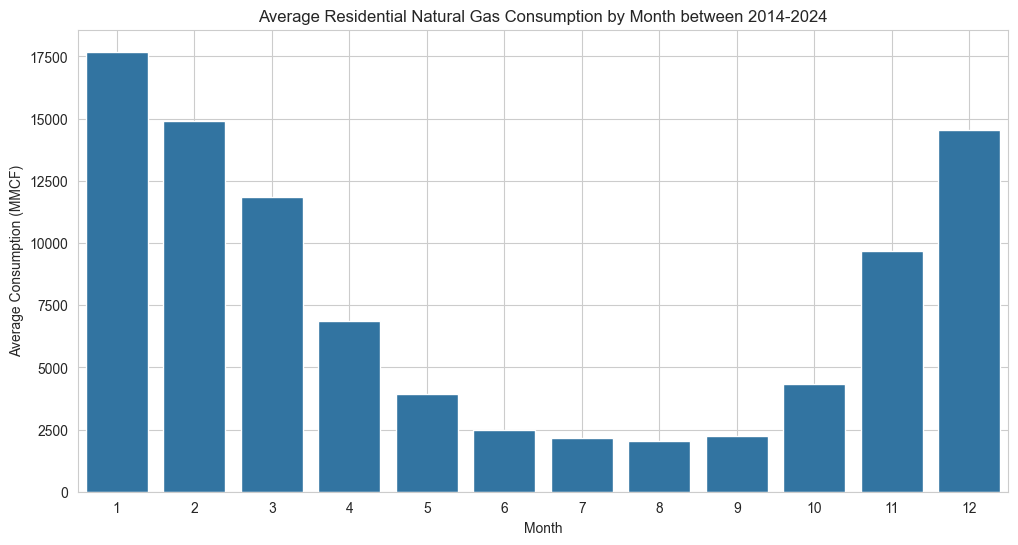

In [168]:
# draw a bar plot to visualize the average values by month for the residential consumption data

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='month', y='value', data=df_avg_month_res, ax=ax)
ax.set_title('Average Residential Natural Gas Consumption by Month between 2014-2024')
ax.set_xlabel('Month')
ax.set_ylabel('Average Consumption (MMCF)')
ax.grid(True)
sns.set_style("whitegrid")

Comment: Above graphic demonstrates average residential natural gas usage. Usage was at its lowest in the summer months throughout the last 10 years. January has the highest peak of all months following by February and November


In [150]:
# save the graph to a file

fig.savefig(os.path.join(path, '04_Visualizations', 'avg_residential_consumption_by_month.png'))

#### 3.1.2. Total Residential Natural Gas Consumption by Year in the Last 10 Years

In [158]:
# group total natural gas consumption by year for the 'Total' month

df_total_year_res = df_res.groupby(['year']).agg({'value':'sum'})

In [159]:
# check the new dataframe

df_total_year_res

,value
year,
2014,5087456.0
2015,4612889.0
2016,4346606.0
2017,4413323.0
2018,4997552.0
2019,5018511.0
2020,4674463.0
2021,4716652.0
2022,4964160.0


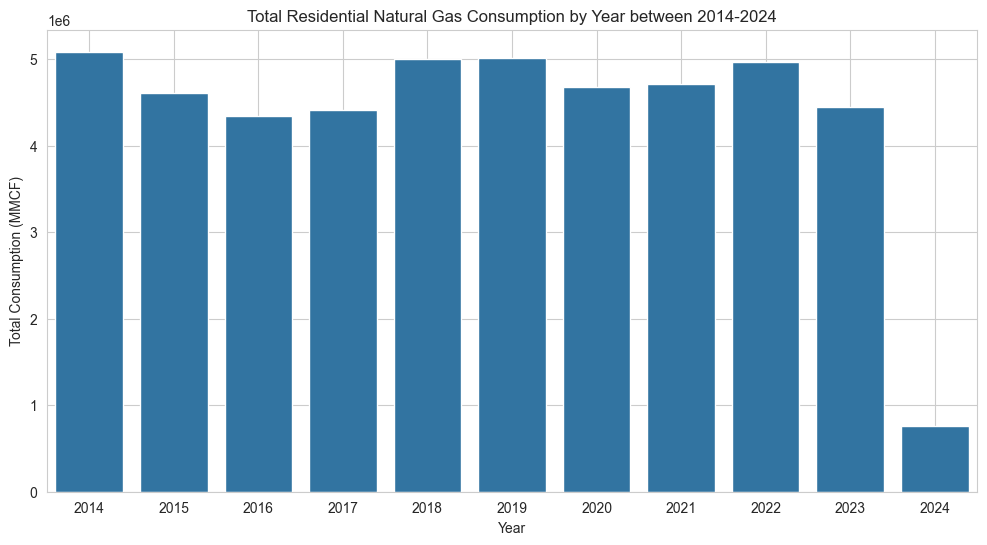

In [160]:
# draw a bar plot to visualize the total values by year for the residential consumption data
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='year', y='value', data=df_total_year_res, ax=ax)
ax.set_title('Total Residential Natural Gas Consumption by Year between 2014-2024')
ax.set_xlabel('Year')
ax.set_ylabel('Total Consumption (MMCF)')
ax.grid(True)
sns.set_style("whitegrid")

Comment: It is interesting to see that the total natural gas usage of residential consumption has the lowest total consumption with around 0.5 M MMCF

In [154]:
# check the total count of data for the year 2024

len(df_res[df_res["year"] == 2024])

47

In [155]:
# check the total count of data for the year 2023

len(df_res[df_res["year"] == 2023])

599

In [156]:
# check the rows for the year 2024

df_res[df_res["year"] == 2024]

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2024-01-01,2024,1,SIA,USA-IA,VRS,Residential Consumption,12637.0,MMCF
2024-01-01,2024,1,SLA,USA-LA,VRS,Residential Consumption,7465.0,MMCF
2024-01-01,2024,1,SNY,NEW YORK,VRS,Residential Consumption,78643.0,MMCF
2024-01-01,2024,1,SOR,USA-OR,VRS,Residential Consumption,8290.0,MMCF
2024-01-01,2024,1,SNM,USA-NM,VRS,Residential Consumption,6974.0,MMCF
2024-01-01,2024,1,SOK,USA-OK,VRS,Residential Consumption,15958.0,MMCF
2024-01-01,2024,1,SAL,USA-AL,VRS,Residential Consumption,7891.0,MMCF
2024-01-01,2024,1,SAK,USA-AK,VRS,Residential Consumption,3379.0,MMCF
2024-01-01,2024,1,SNV,USA-NV,VRS,Residential Consumption,8271.0,MMCF


Comment: It seems like the data used for 2024 is limited to the first month of the year, therefore 2024 has the lowest residential natural gas consumption.

In [157]:
# save the graph to a file

fig.savefig(os.path.join(path, '04_Visualizations', 'total_residential_consumption_by_year.png'))

### 3.2. Commercial Analysis

#### 3.2.1. Average Residental Natural Gas Consumption by Month in the Last 10 Years

In [161]:
# dilter the dataframe to only include the commercial consumption data

df_com = df2[df2['process-name'] == 'Commercial Consumption']


In [162]:
# check the newly created dataframe

df_com

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,SFL,FLORIDA,VCS,Commercial Consumption,6605.0,MMCF
2014-01-01,2014,1,SNH,USA-NH,VCS,Commercial Consumption,1691.0,MMCF
2014-01-01,2014,1,SOR,USA-OR,VCS,Commercial Consumption,4711.0,MMCF
2014-01-01,2014,1,SDE,USA-DE,VCS,Commercial Consumption,2128.0,MMCF
2014-01-01,2014,1,SAZ,USA-AZ,VCS,Commercial Consumption,3915.0,MMCF
...,...,...,...,...,...,...,...,...
2024-01-01,2024,1,SVA,USA-VA,VCS,Commercial Consumption,10544.0,MMCF
2024-01-01,2024,1,SSD,USA-SD,VCS,Commercial Consumption,2271.0,MMCF
2024-01-01,2024,1,SCT,USA-CT,VCS,Commercial Consumption,8135.0,MMCF


In [163]:
# group by each month and calcualte the average value

df_avg_month_com = df_com.groupby(['month']).agg({'value':'mean'})

In [164]:
# check the new dataframe

df_avg_month_com

,value
month,
1,10245.298828
2,8836.249023
3,7466.441406
4,4883.125488
5,3423.568604
6,2765.860840
7,2701.897949
8,2729.851074
9,2853.316895


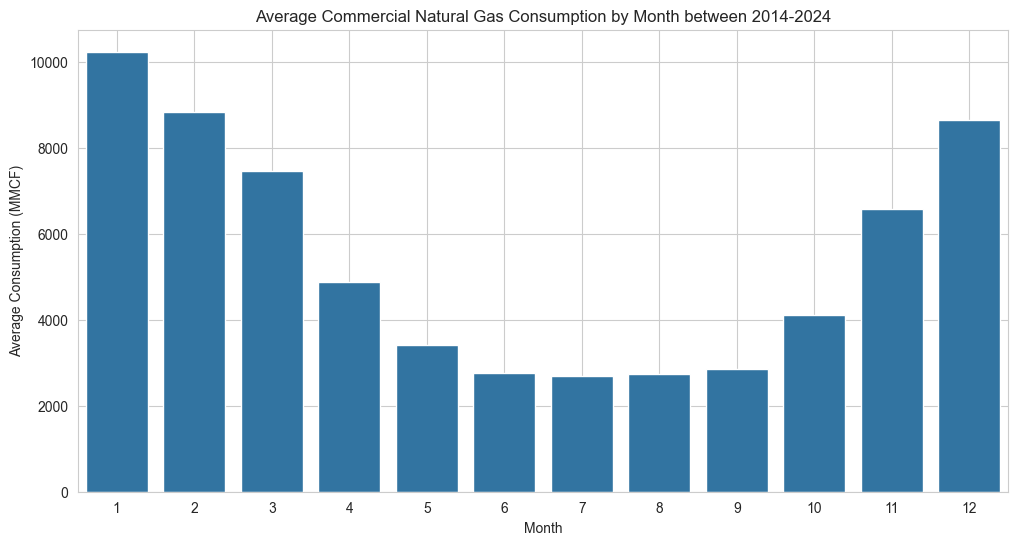

In [165]:
# draw a bar plot to visualize the average values by month for the commercial consumption data

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='month', y='value', data=df_avg_month_com, ax=ax)
ax.set_title('Average Commercial Natural Gas Consumption by Month between 2014-2024')
ax.set_xlabel('Month')
ax.set_ylabel('Average Consumption (MMCF)')
ax.grid(True)
sns.set_style("whitegrid")


Comment: The commercial natural gas consumption has its maximum peak on winter times like November, December, January whereas it has the lowest peak on summer months

In [167]:
# save the graph to a file

fig.savefig(os.path.join(path, '04_Visualizations', 'average_commercial_consumption_by_month.png'))

#### 3.2.2. Total Residential Natural Gas Consumption by Year in the Last 10 Years

In [171]:
# group by each year and calculate the total value for the commercial consumption data

df_total_year_com = df_com.groupby(['year']).agg({'value':'sum'})

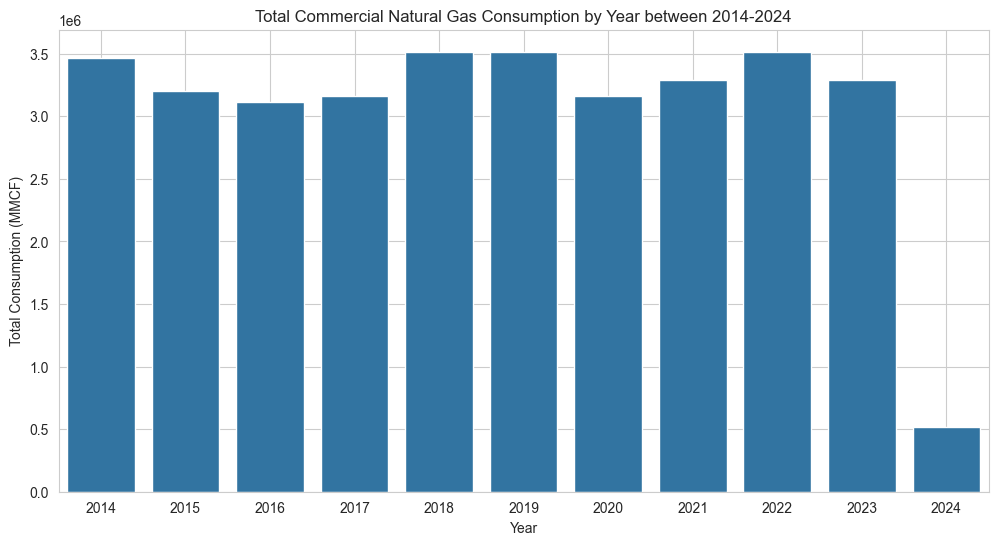

In [172]:
# plot a bar plot to visualize the total values by year for the commercial consumption data

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='year', y='value', data=df_total_year_com, ax=ax)
ax.set_title('Total Commercial Natural Gas Consumption by Year between 2014-2024')
ax.set_xlabel('Year')
ax.set_ylabel('Total Consumption (MMCF)')
ax.grid(True)
sns.set_style("whitegrid")


Comment: Total Commercial Natural Gas Consumption has almost the same level in year 2014, 2018, 2019 and 2023 with around 3.5 M MMCF.

In [173]:
# save the graph to a file

fig.savefig(os.path.join(path, '04_Visualizations', 'total_commercial_consumption_by_year.png'))

### 3.3. Comparision of Residential and Commercial Natural Gas Consumption Analysis

#### 3.3.1. Comparision of Average Natural Gas Consumption by Month in the Last 10 Years

In [183]:
# group by each month and year and calculate the average value
df_average_month_comparison = df2.groupby(['month', 'process-name']).agg({'value':'mean'})

In [184]:
# check the new dataframe

df_average_month_comparison

value
month process-name                         
1     Commercial Consumption   10245.298828
      Residential Consumption  17688.419922
2     Commercial Consumption    8836.249023
      Residential Consumption  14923.256836
3     Commercial Consumption    7466.441406
      Residential Consumption  11839.019531
4     Commercial Consumption    4883.125488
      Residential Consumption   6851.274414
5     Commercial Consumption    3423.568604
      Residential Consumption   3941.667969
6     Commercial Consumption    2765.860840
      Residential Consumption   2476.531494
7     Commercial Consumption    2701.897949
      Residential Consumption   2170.720947
8     Commercial Consumption    2729.851074
      Residential Consumption   2035.901733
9     Commercial Consumption    2853.316895
      Residential Consumption   2257.015869
10    Commercial Consumption    4113.070801
      Residential Consumption   4329.187988
11    Commercial Consumption    6573.430176
      Residential Consumption   9658.893555
12    Commercial Consumption    8648.434570
      Residential Consumption  14540.575195

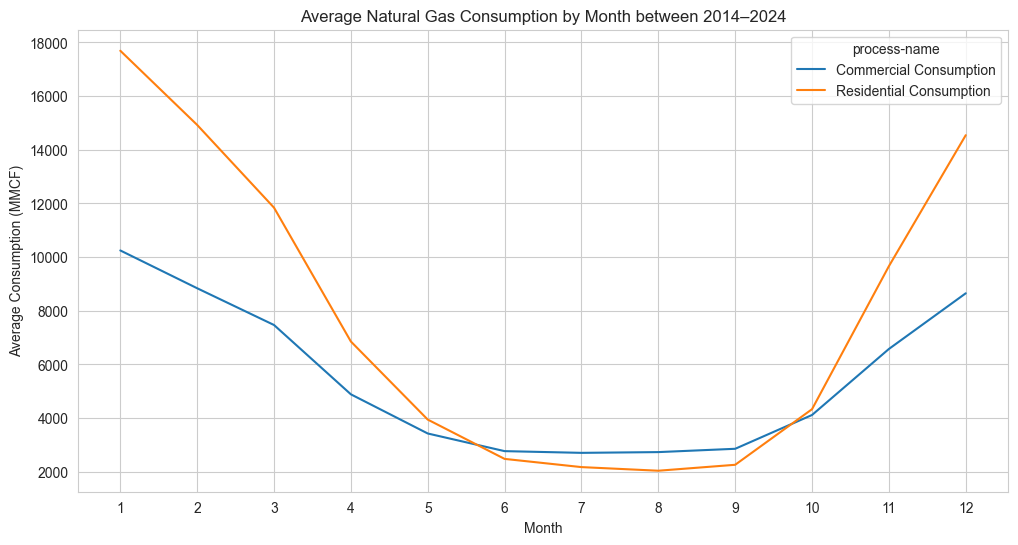

In [ ]:
# draw a line plot to visualize the average values by month for the residential and commercial consumption data

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='month', y='value', hue='process-name', data=df_average_month_comparison.reset_index(), ax=ax)
ax.set_title('Average Natural Gas Consumption by Month between 2014–2024')
ax.set_xlabel('Month')
ax.set_ylabel('Average Consumption (MMCF)')
ax.set_xticks(range(1, 13))  # show each month
ax.grid(True)
sns.set_style("whitegrid")


Comment: Average residential consumption is for the most of the time in the year is higher than the commercial usage, when the summer arrives commercial cosnumption takes it over


In [182]:
# save the graph to a file

fig.savefig(os.path.join(path, '04_Visualizations', 'average_consumption_by_month_line.png'))

#### 3.3.2. Comparison of Total Natural Gas Consumption by Year in the Last 10 Years

In [186]:
df2.head()

,year,month,area,area-name,process,process-name,value,units
date,,,,,,,,
2014-01-01,2014,1,SFL,FLORIDA,VCS,Commercial Consumption,6605.0,MMCF
2014-01-01,2014,1,SNH,USA-NH,VCS,Commercial Consumption,1691.0,MMCF
2014-01-01,2014,1,SOR,USA-OR,VCS,Commercial Consumption,4711.0,MMCF
2014-01-01,2014,1,SDE,USA-DE,VCS,Commercial Consumption,2128.0,MMCF
2014-01-01,2014,1,SAZ,USA-AZ,VCS,Commercial Consumption,3915.0,MMCF


In [187]:
# group by each year and the process name and calculate the total value

df_total_year_comparison = df2.groupby(['year', 'process-name']).agg({'value':'sum'})

In [188]:
# check the new dataframe

df_total_year_comparison

value
year process-name                      
2014 Commercial Consumption   3466303.0
     Residential Consumption  5087456.0
2015 Commercial Consumption   3201736.0
     Residential Consumption  4612889.0
2016 Commercial Consumption   3109584.0
     Residential Consumption  4346606.0
2017 Commercial Consumption   3164603.0
     Residential Consumption  4413323.0
2018 Commercial Consumption   3513955.0
     Residential Consumption  4997552.0
2019 Commercial Consumption   3514555.0
     Residential Consumption  5018511.0
2020 Commercial Consumption   3162658.0
     Residential Consumption  4674463.0
2021 Commercial Consumption   3289071.0
     Residential Consumption  4716652.0
2022 Commercial Consumption   3509075.0
     Residential Consumption  4964160.0
2023 Commercial Consumption   3284990.0
     Residential Consumption  4449833.0
2024 Commercial Consumption    520365.0
     Residential Consumption   754890.0

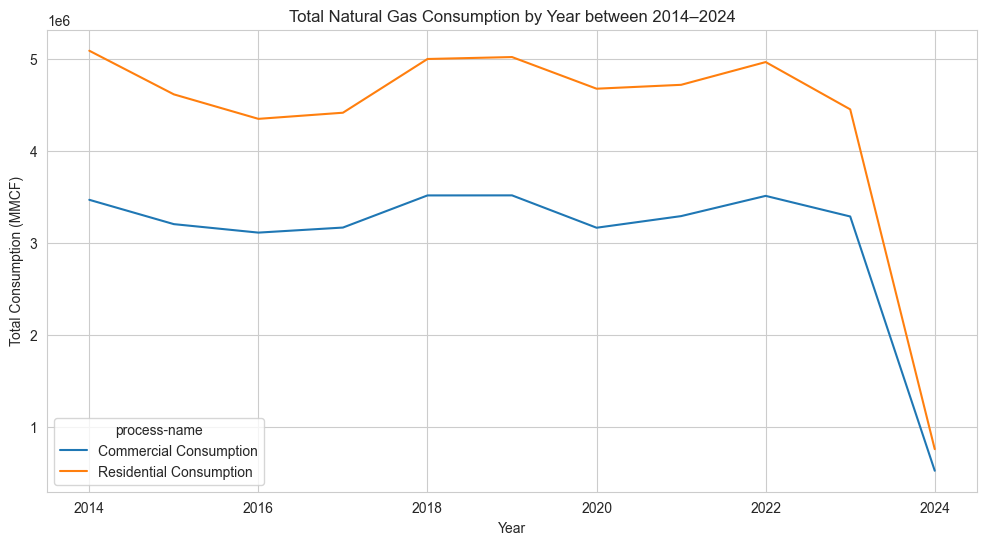

In [189]:
# draw a line plot to visualize the total natural gas consumption by year in the last 10 years

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='process-name', data=df_total_year_comparison.reset_index(), ax=ax)
ax.set_title('Total Natural Gas Consumption by Year between 2014–2024')
ax.set_xlabel('Year')
ax.set_ylabel('Total Consumption (MMCF)')
ax.grid(True)
sns.set_style("whitegrid")


Comment: The chart illustrates the annual total natural gas consumption for residential and commercial sectors from 2014 to 2024.
Residential consumption consistently exceeds commercial usage throughout the years, with both showing a noticeable drop in 2024.
This sharp decline in 2024 is likely due to incomplete data coverage, as only early months of the year may be included.

In [190]:
# save the graph to a file

fig.savefig(os.path.join(path, '04_Visualizations', 'total_consumption_by_year.png'))

## 4. Exporting Data

In [191]:
# export the data

df2.to_parquet(os.path.join(path, '02_Data', 'prepared_data', 'gas_data_cleaned_no_us.parquet'))